# Notebook 2:  Pump Depletion and Dephasing


LWFA Workbook II

This is the second notebook on LWFA where we explore the evolution of the laser using 1D moving window simulations to understand the effects of pump depletion and dephasing.



OSIRIS simulations are done in normalized units. 

* Time:  $t' = t \omega_{p}$

* Frequency: $\omega' = \frac{\omega}{\omega_{p}}$ 

* Position: $\vec{x}' = \frac{\omega_{p}}{c} \vec{x}$  

* Momenta: $\vec{u}' = \frac{\vec{p}}{m_{e} c} = \frac{\vec{\gamma v}}{c} = \frac{\vec{u}} {c}$  

* Electric field: $\vec{E}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{E}$  

* Magnetic field: $\vec{B}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{B}$  


In [1]:
# **********************************
# First Run This Cell to 
# import the necessary libraries
# **********************************
#
# Please run this cell before running anything, and run this cell again if you have restarted the 
# python kernel.
#
# This cell imports useful routines to diagnose the simulations here
#

%matplotlib inline
import osiris
from osiris import tajima
from tajima_helper import plot_maxgamma_t, newifile, newifile2, laser_envelope, tajima_widget, tajima_moving_widget, xt_and_energy_plot
import numpy as np
import matplotlib.pyplot as plt
from osh5vis import osplot
from osh5io import read_h5
from osh5utils import fft
from ipywidgets import interact_manual,Layout,interact, FloatSlider
import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")

## Here we illustrate and explore the OSIRIS pulse shape:

In these 1D simulations the laser envelope has a shape in time.  This shape is often approximated by a Gaussian with a width $\sigma_t$.  However, in a simulation the laser envelope cannot be a Gaussian because it will lead to infinitely long pulses in time.  To make the laser shape finite OSIRIS uses a polynomial function 

$ P(\tau) = \tau + \tau + \tau$

where $\tau = t/t_{rise}$ 

In [2]:
# This cell shows the laser envelope shape for given t_rise, t_fall, and Lt.  
#
interact(laser_envelope, trise=FloatSlider(min=0.00, max=5, step=.05, description='$t_{rise}$', value = 1.57),
         tflat=FloatSlider(min=0.00, max=5, step=.05, description='$Lt$', value = 0),
         tfall=FloatSlider(min=0.00, max=5, step=.05, description='$t_{fall}$', value = 1.57));

interactive(children=(FloatSlider(value=1.57, description='$t_{rise}$', max=5.0, step=0.05), FloatSlider(value…

## Laser Propagation:

Here we look at the light dispersion in a plasma, and look at the effects of dephasing, where the energetic electrons outrun the laser and the plasma waves.  

In [ ]:
## Hit <shift>+<return> to look at results

dirname = './cased-moving-24'
tajima(rundir=dirname)

## Case 1:  Linear ($v_{osc}/c=0.3$, $\omega_0/\omega_p = 10$)

In [3]:
## Hit <shift>+<return> to run

dirname = 'linear-a03-w10'
osiris.runosiris(rundir=dirname,inputfile='linear-a03-w10.txt')
plot_maxgamma_t(dirname)    

runosiris completed normally
max gamma =  1.0071742649611337


/opt/conda/lib/python3.7/importlib/__init__.py:127: H5pyDeprecationWarning: The h5py.highlevel module is deprecated, code should import directly from h5py, e.g. 'from h5py import File'.
  return _bootstrap._gcd_import(name[level:], package, level)


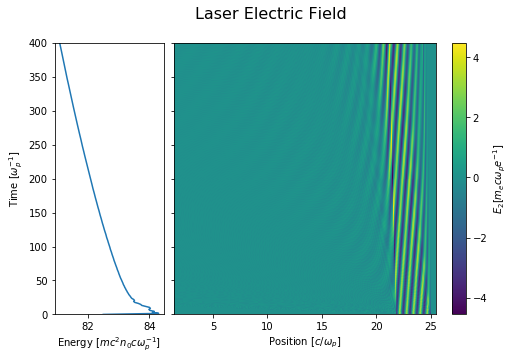

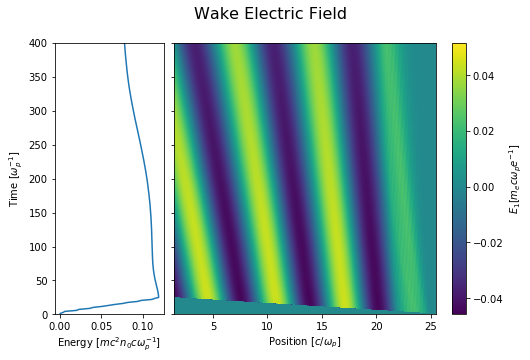

In [4]:
dirname = './linear-a03-w10'
xt_and_energy_plot(rundir=dirname, field = 'e2')
xt_and_energy_plot(rundir=dirname, field = 'e1')

## Case 1:  Linear ($v_{osc}/c=0.3$, $\omega_0/\omega_p = 7$)

In [6]:
## Hit <shift>+<return> to run

dirname = 'linear-a03-w7'
osiris.runosiris(rundir=dirname,inputfile='linear-a03-w7.txt')
plot_maxgamma_t(dirname)    

runosiris completed normally
max gamma =  1.009752444909147


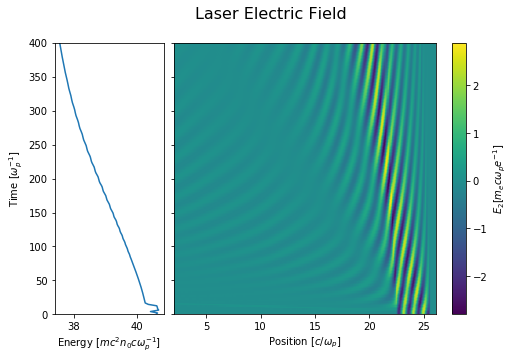

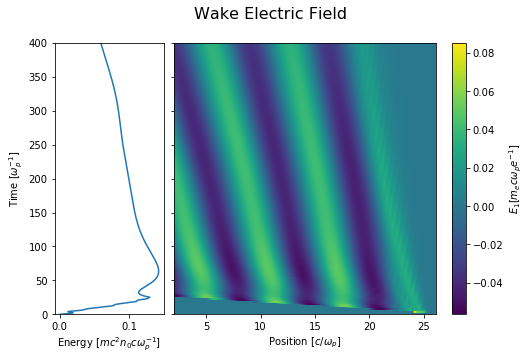

In [7]:
dirname = './linear-a03-w7'
xt_and_energy_plot(rundir=dirname, field = 'e2')
xt_and_energy_plot(rundir=dirname, field = 'e1')

## Simulation Sandbox, with moving window
The cell below allows you to explore different parameters with a moving window.

In [3]:
## Hit <shift>+<return> to start the widget, which contains a interface to change OSIRIS parameters

tajima_moving_widget()

interactive(children=(Text(value='casea-moving-24.txt', description='Template Input File:', layout=Layout(widt…

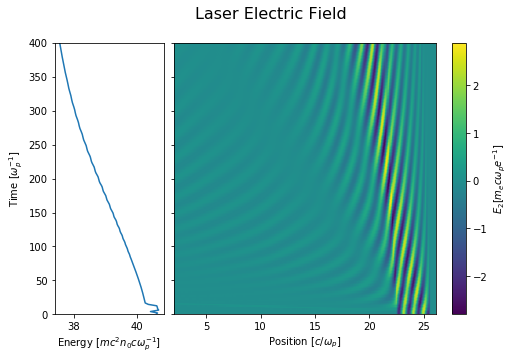

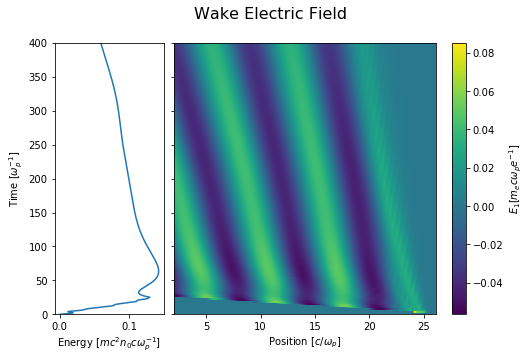

In [5]:
dirname = './case1-moving'
xt_and_energy_plot(rundir=dirname, field = 'e2')
xt_and_energy_plot(rundir=dirname, field = 'e1')